# Salary Predictions Based on Job Descriptions

In [4]:
#import your libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import sys
from IPython.core.pylabtools import figsize

In [1]:
#your info here
__author__ = "Clarissa Carvalho Chevalier"
__email__ = "chevalierclarissa@gmail.com"

# Part 1 - DEFINE

### ---- 1 Define the problem ----

## Part 2 - DISCOVER

### 2. Loading the data

In [2]:
df = pd.read_csv('data/train_features.csv')
target_df = pd.read_csv('data/train_salaries.csv')
test_df = pd.read_csv('data/test_features.csv')

In [3]:
merged = df.merge(target_df, how='left', on='jobId')
merged.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### 3. Cleaning the data
look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [31]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


#### Check for duplicates

In [32]:
merged.jobId.nunique() == len(df)

True

#### Check for null values

In [33]:
merged.isnull().sum().sort_values(ascending=False)

salary                 0
milesFromMetropolis    0
yearsExperience        0
industry               0
major                  0
degree                 0
jobType                0
companyId              0
jobId                  0
dtype: int64

#### Check for unique values:
    - discrete feature w only one value (not explainatory)
    - discrete feature w high cardinality

In [34]:
merged.nunique().sort_values(ascending=False)

jobId                  1000000
salary                     280
milesFromMetropolis        100
companyId                   63
yearsExperience             25
major                        9
jobType                      8
industry                     7
degree                       5
dtype: int64

In [37]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']
cols_to_filter = ['jobId', 'companyId']

In [3]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

## 4 Explore the data (EDA)
### Single-variable plots

In [35]:
merged.salary.describe()

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

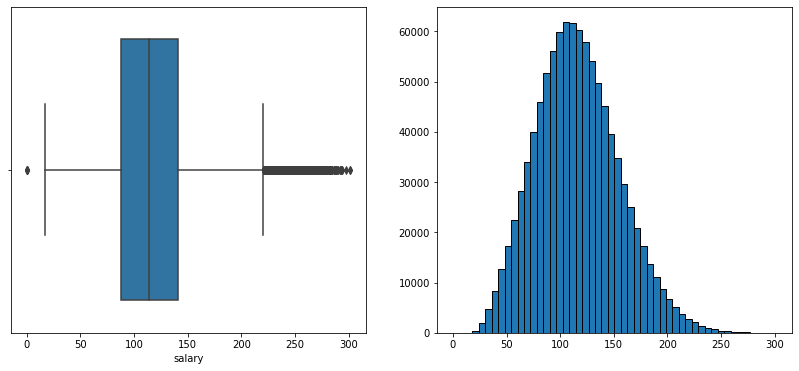

In [39]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(target_df.salary)
plt.subplot(1,2,2)
plt.hist(target_df['salary'], bins =50, edgecolor = 'k')
plt.show()

In [46]:
Q1 = merged['salary'].describe()['25%']
Q3 = merged['salary'].describe()['75%']

#interquartile range
IQR = Q3 - Q1

#Remove Outliers
merged = merged[(merged['salary'] > (Q1 - 3*IQR)) & (merged['salary'] < (Q3 + 3*IQR))]
print('The upper and lower bounds for alleged outliers are {} and {}.'.format((Q1-1.5*IQR), (Q3+1.5*IQR)))

The upper and lower bounds for alleged outliers are 8.5 and 220.5.


In [42]:
merged[merged.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,milesqcut,yearsqcut
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0,up to 25miles,up to 12y
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0,up to 25miles,up to 6y
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0,up to 75miles,up to 6y
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0,up to 25miles,up to 18y
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0,up to 50miles,up to 6y


In [55]:
merged[(merged.salary>220.5)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,milesqcut,yearsqcut
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223,up to 75miles,up to 24y
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223,up to 25miles,up to 24y
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248,up to 25miles,up to 24y
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240,up to 25miles,up to 24y
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225,up to 25miles,up to 24y
...,...,...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227,up to 50miles,up to 18y
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223,up to 25miles,up to 18y
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228,up to 25miles,up to 24y
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233,up to 25miles,up to 24y


#### Removing outliers

In [54]:
merged = merged[merged.salary > 8.5]

## Two Variable Plots
### Density plots for descriptive variables

In [90]:
merged['milesqcut'] = pd.qcut(merged['milesFromMetropolis'], q=4, labels=['up to 25miles', 'up to 50miles','up to 75miles','up to 99miles']) #to make quantiles in describe function
merged['yearsqcut'] = pd.qcut(merged['yearsExperience'], q=4, labels=['up to 6y', 'up to 12y','up to 18y','up to 24y']) #to make quantiles in describe function

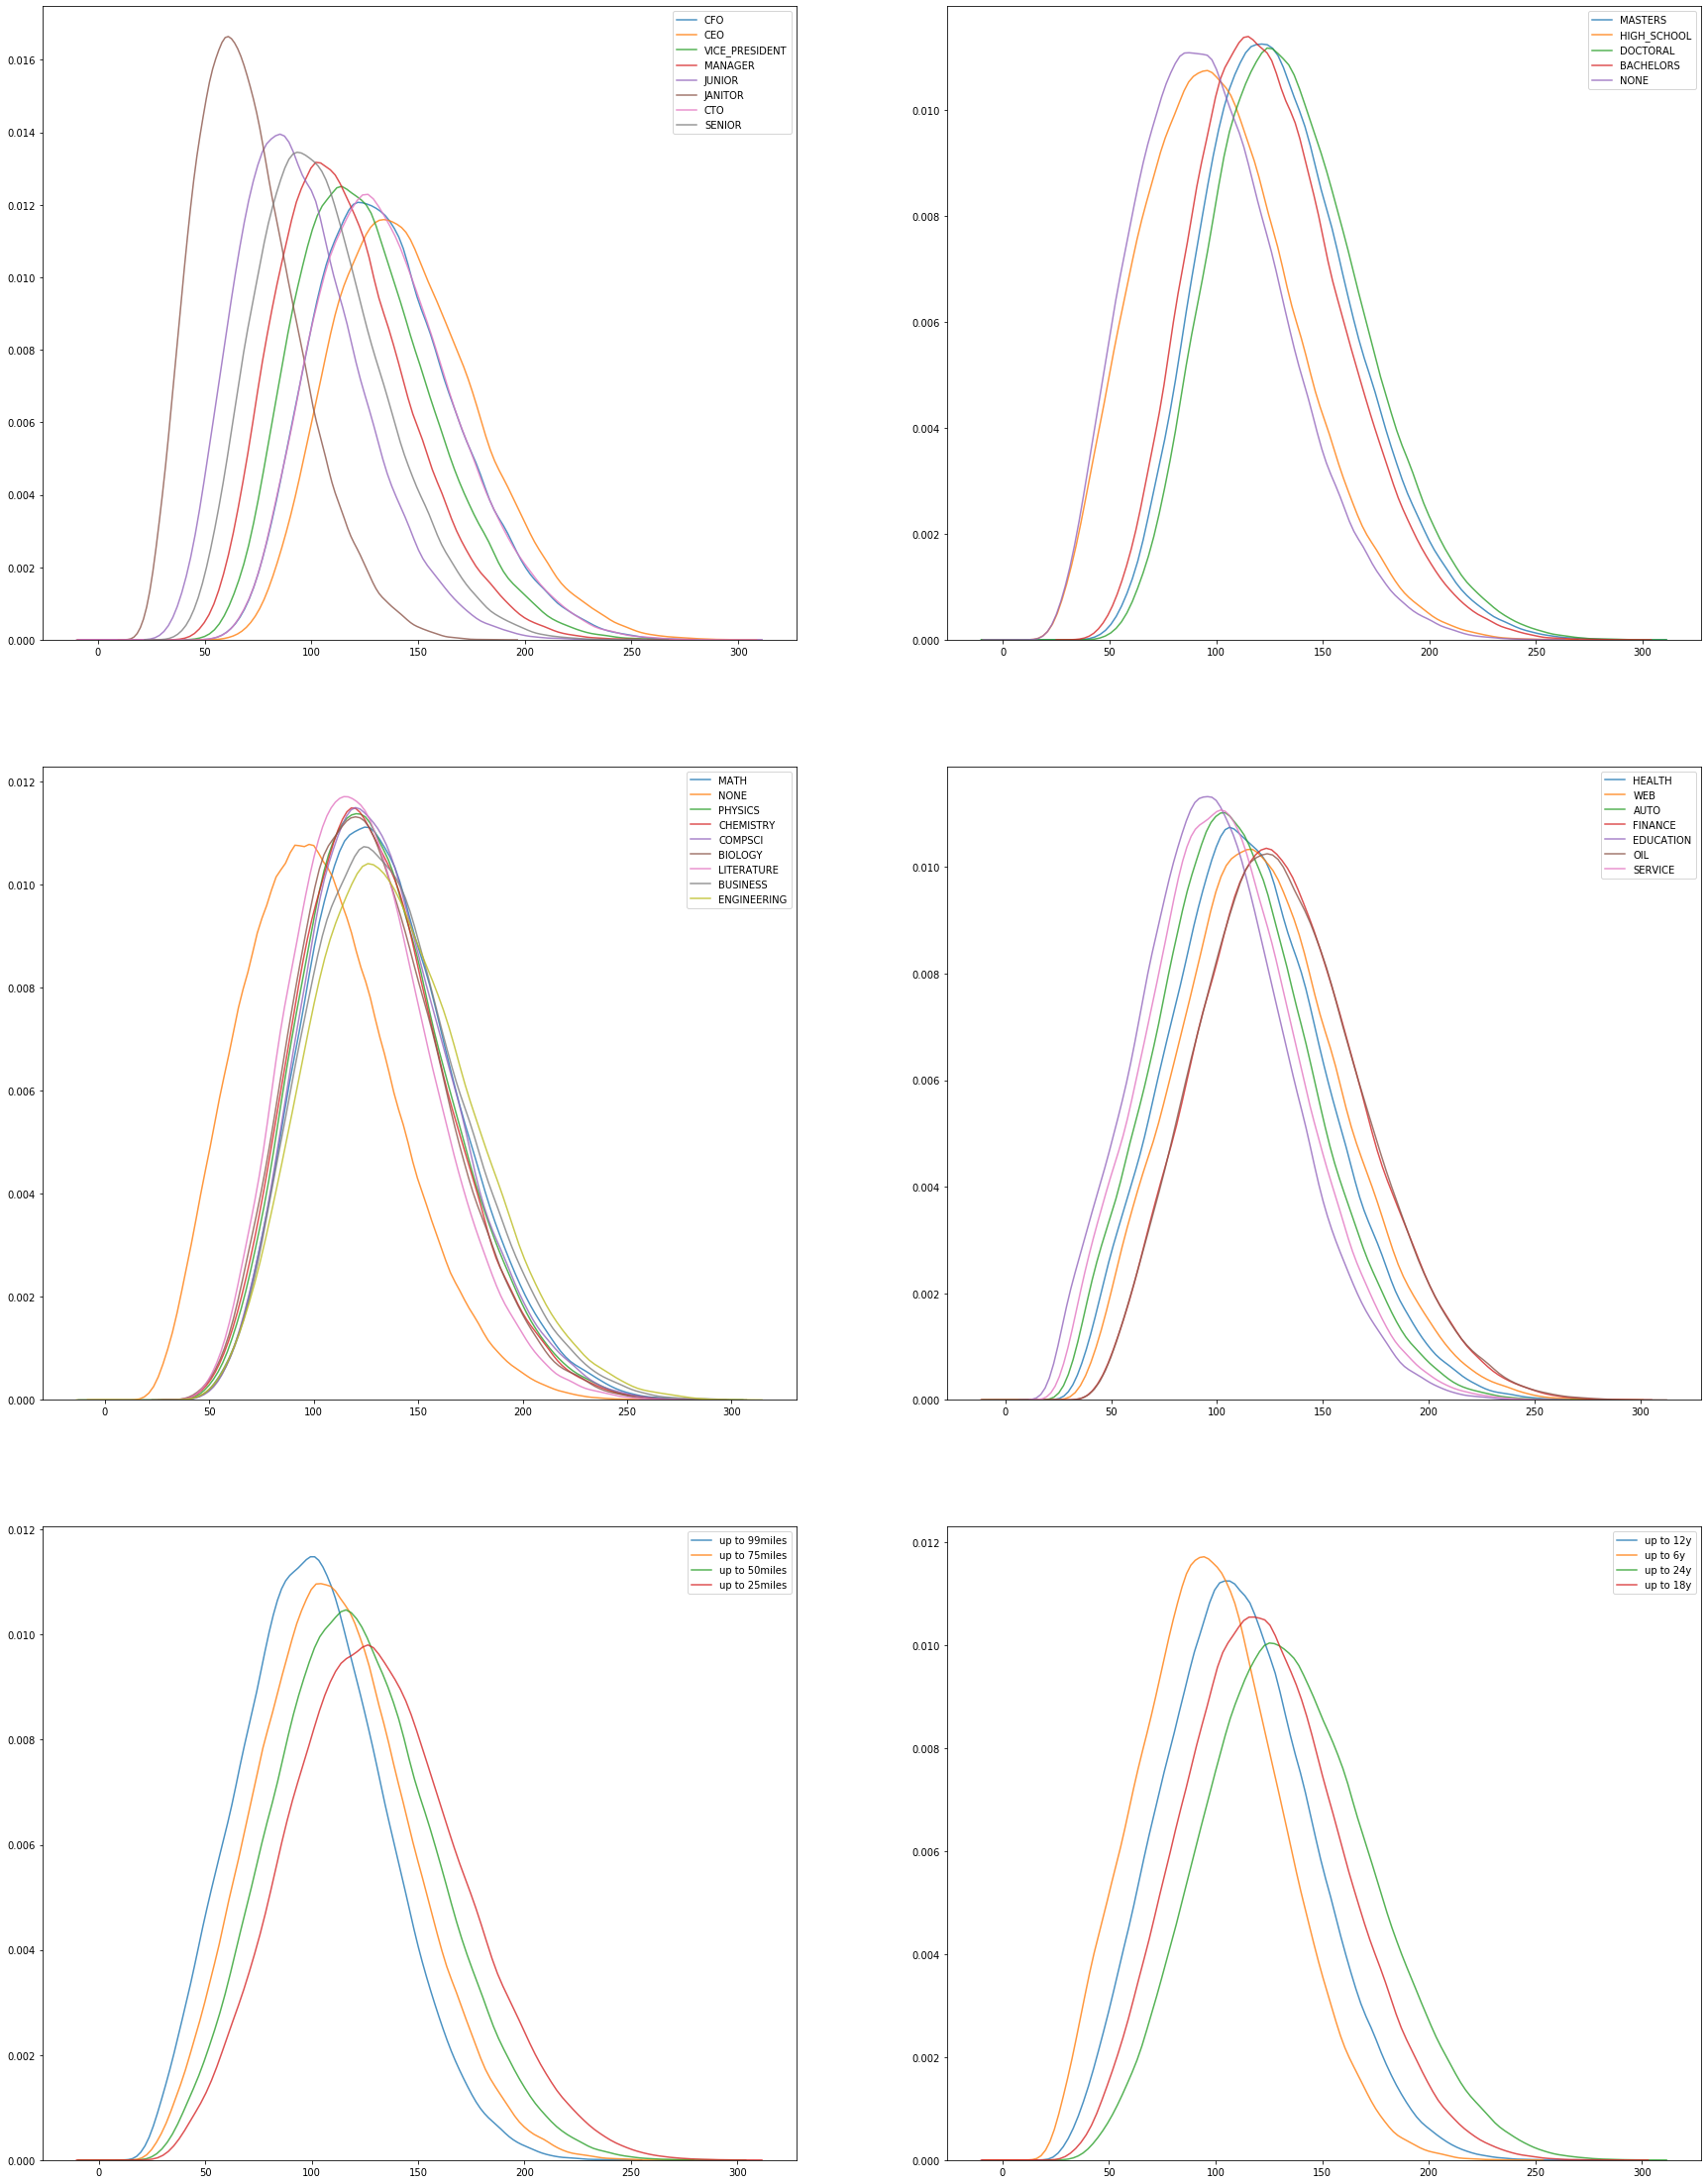

In [91]:
nrows=3; ncols=2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows*10, ncols*20))

cols_list = np.array(merged.columns.drop(['salary', 'jobId', 
                                          'companyId','milesFromMetropolis','yearsExperience'])).reshape(3,2)
for col_row, ax_row in zip(cols_list, axes):
    for unit, ax in zip(col_row, ax_row):
        
        for subject in merged[unit].unique():
            subset = merged[merged[unit] == subject]
            sns.kdeplot(subset['salary'], label=subject, shade=False, alpha=0.8, ax=ax)

In [56]:
merged.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary', 'milesqcut',
       'yearsqcut'],
      dtype='object')

- As for job types, the positions of high scaler are the ones with higher salaries (CEO, CFO, CTO)
- Larger salaries happen also for higher skilled educations (Doctors, Masters, bachelors)
- The fields that have the largest salaries are for Engineering, Business and Math
- As for industries: Oil and Finance are the higher payers
- And for the numerical variables, those closer to the metropolis and the positions that require more experience also tends to pay more

### Scatterplot for Numerical columns

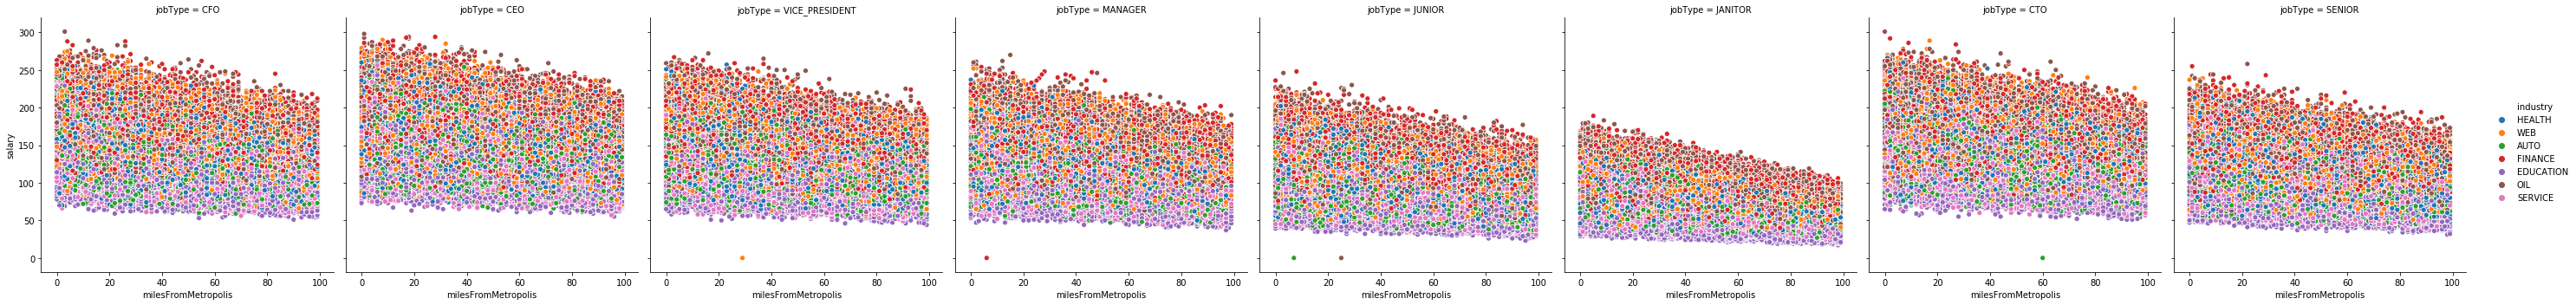

In [33]:
sns.relplot(x= 'milesFromMetropolis', y = 'salary', hue='industry', col='jobType', kind = 'scatter', data= merged)

For all of job professions, it seems that salary has a negative correlation with distance from metropolis. The longer the job position is, the lesser it tends to be paid.

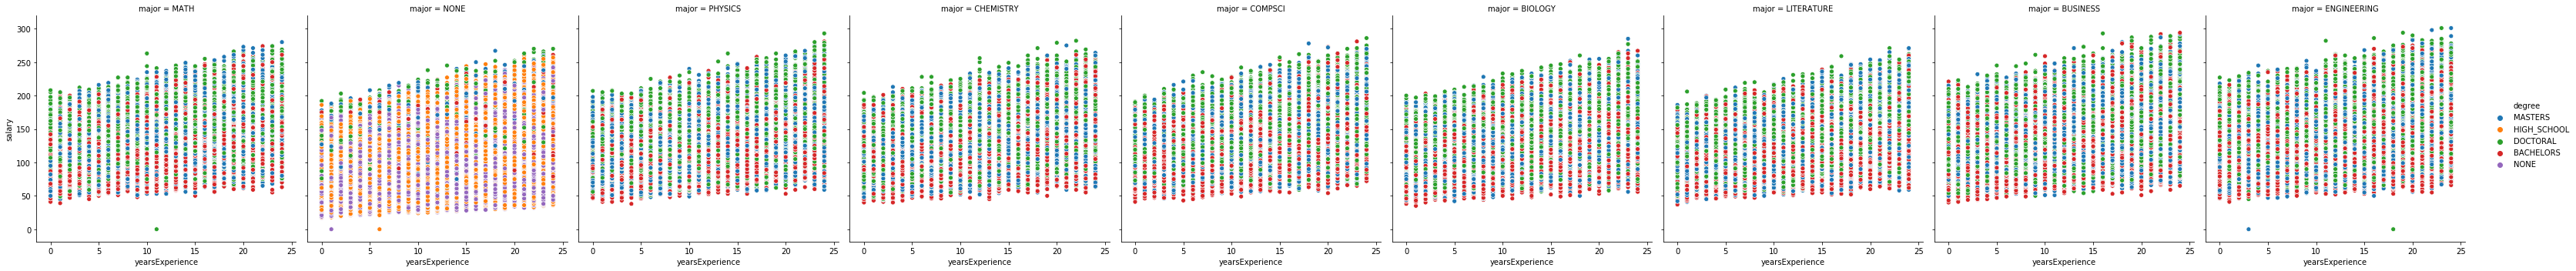

In [38]:
sns.relplot(x= 'yearsExperience', y = 'salary', data= merged, hue='degree', col='major', kind = 'scatter')

For all of the majors, it seems that the salary has a positive correlation with years of experience

### Correlation Matrix

In [86]:
# def encode_label(df, col):
#     #encode the categories using average salary for each category to replace label
#     for col in df.columns:
#         if df[col].dtype.name == "object":
#             cat_dict ={}
#             cats = df[col].cat.categories.tolist()
#             for cat in cats:
#                 cat_dict[cat] = merged[merged[col] == cat]['salary'].mean()   
#             df[col] = df[col].map(cat_dict)
#     return df

In [88]:
# df = encode_label(merged, col)

In [89]:
# # Correlations between selected features and response
# fig = plt.figure(figsize=(12, 10))
# features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
# sns.heatmap(df.corr(), cmap='Blues', annot=True)
# plt.xticks(rotation=45)
# plt.show()

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

In [ ]:
class preprocess:
    
    def __init__(self, cols_to_filter):
        self.cols_to_filter = cols_to_filter
    
    def fit(self, X, y=None):
        return X
    
    def transform(self, X, y=None):
        return X_new

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data